# ***Medical Insurance Premium Prediction With Machine Learning*** 
## By Nakul Sharma

<img src="page.png" style="width:909px;height:509">

***Importing necessary library***

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

***Importing the dataset*** 

In [3]:
df = pd.read_csv("C:\\Users\\nakul\\Downloads\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

***Handeling Null Values***

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***Getting Statistical summary of the dataset***

In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


***Filtering Dataset for some quick Understandings***

In [7]:
r1 = df['region'].value_counts()
r1

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

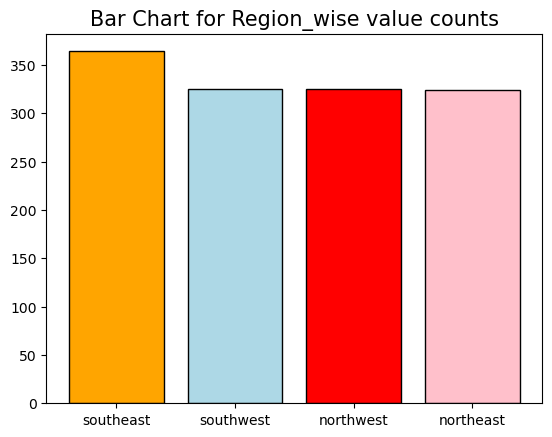

In [8]:
plt.bar(r1.index,r1,color=['orange','lightblue','red','pink'],edgecolor='black')
plt.title('Bar Chart for Region_wise value counts',fontsize=15)
plt.show()

In [9]:
# grouping the data according to region to get some insights related to charges 
region = df.groupby(by='region').mean()
region
# So we can see that southeast region has the maximum mean of charges followed by northeast 

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


### ***Feature Engineering***


***Converting Categorical to numerical for better insights at the time of prediction***

In [10]:
df['sex'].nunique()

2

In [11]:
r2 = df['sex'].value_counts()
r2

male      676
female    662
Name: sex, dtype: int64

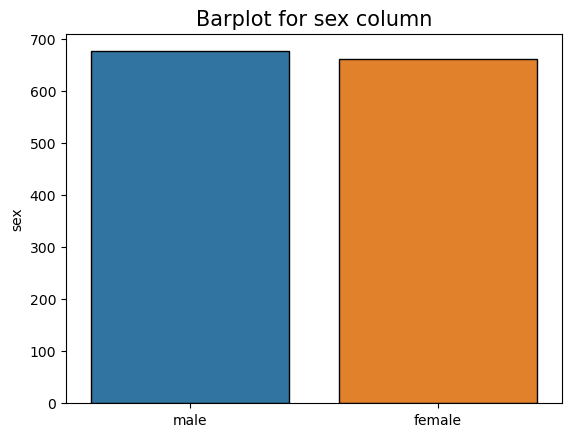

In [12]:
sns.barplot(x=r2.index,y=r2,edgecolor = 'black')
plt.title('Barplot for sex column',fontsize=15)
plt.show()

In [13]:
df['sex'] = df['sex'].apply(lambda x:0   if x=='female' else 1)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
r3 = df['smoker'].value_counts()
r3

no     1064
yes     274
Name: smoker, dtype: int64

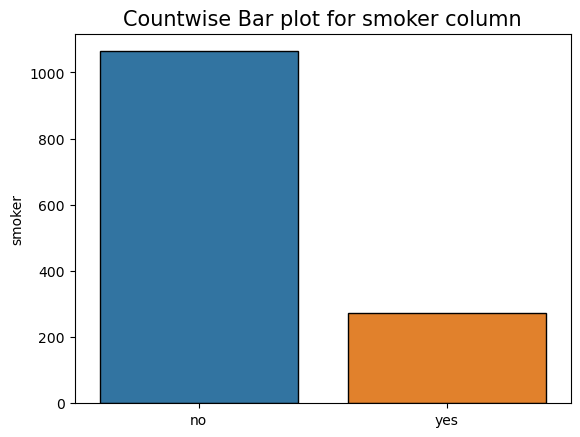

In [16]:
sns.barplot(x=r3.index,y=r3,edgecolor = 'black')
plt.title('Countwise Bar plot for smoker column',fontsize=15)
plt.show()

In [17]:
df['smoker'] = df['smoker'].apply(lambda x:0 if x=='no' else 1)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# Creating dummy column for the region column
region_dummies = pd.get_dummies(df['region'],drop_first=True)
region_dummies.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [20]:
# Attaching the dummy region column with the data frame 
df = pd.concat([df,region_dummies], axis=1)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [22]:
# Now lets drop the original 'region column'
df.drop('region',axis=1,inplace=True)

In [23]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### ***Performing Exploratory Data Analysis for the Dataset***

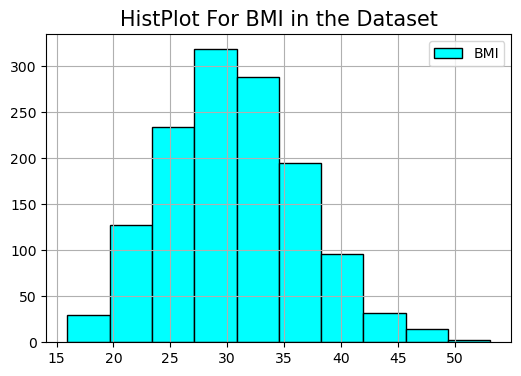

In [24]:
# Histogram For the BMI(Body Mass Index)
df['bmi'].hist(figsize=(6,4),color='cyan',edgecolor='black',label='BMI')
plt.title('HistPlot For BMI in the Dataset',fontsize=15)
plt.legend()
plt.show()

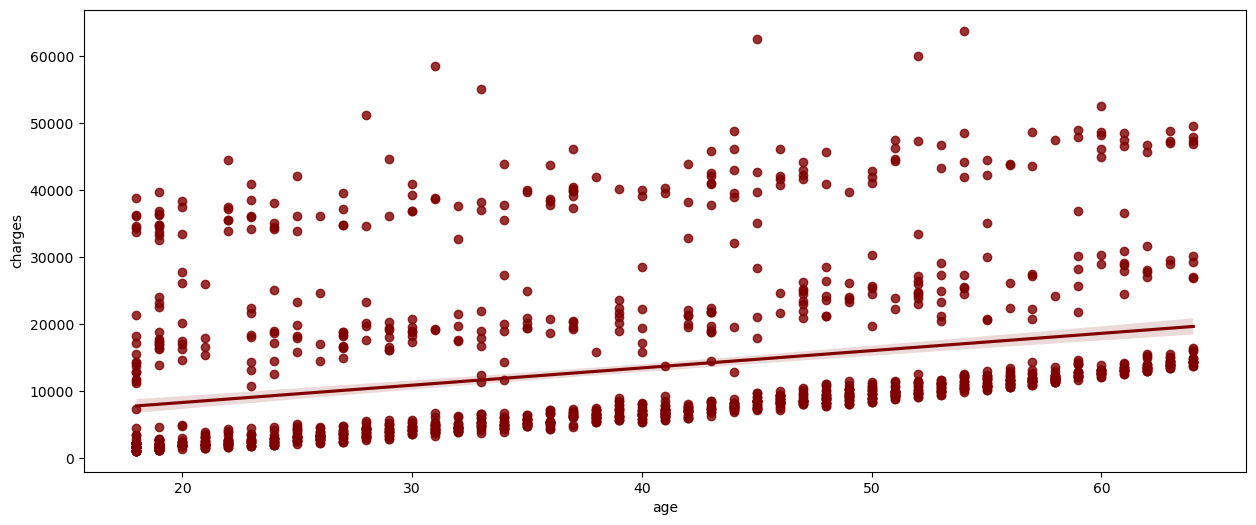

In [25]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = df ,color='maroon')
plt.show()

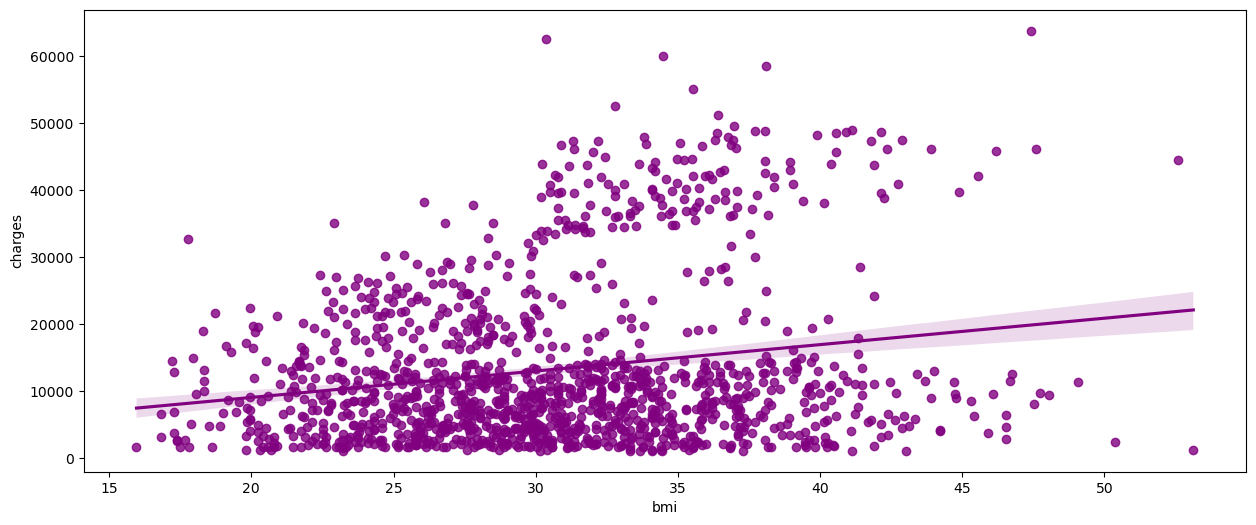

In [26]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = df,color = 'purple')
plt.show()

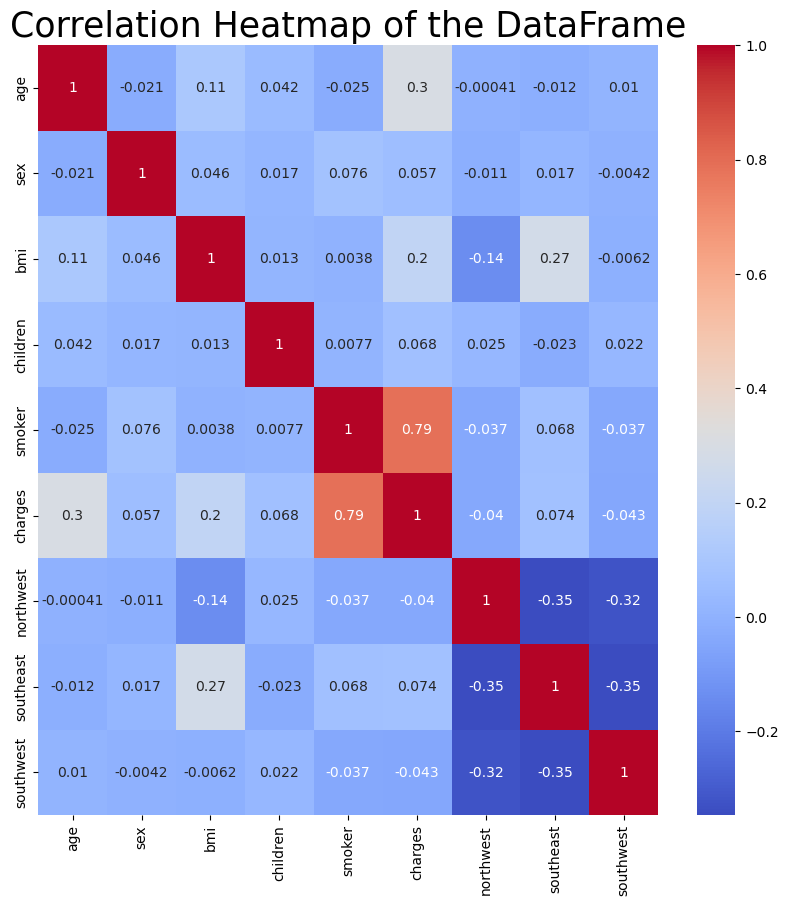

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')
plt.title('Correlation Heatmap of the DataFrame',fontsize=25)
plt.show()
# smoker and age have positive correlations with charges 

# ***Predicting the Charges using ML & DL***

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

## ***Selection of X & Y***

In [29]:
x = df.drop('charges',axis=1)
y = df['charges']
print(f'Shape of X is {x.shape} and Type of X is {type(x)}')
print(f'Shape of Y is {y.shape} and Type of Y is {type(y)}')

Shape of X is (1338, 8) and Type of X is <class 'pandas.core.frame.DataFrame'>
Shape of Y is (1338,) and Type of Y is <class 'pandas.core.series.Series'>


In [30]:
#  converting the X & Y into numpy array and type to float datatype
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [31]:
y = y.reshape(-1,1)

#### ***Scaling the Data before loading to the models***

In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scalar_x = StandardScaler()
x = scalar_x.fit_transform(x)

scalar_y = StandardScaler()
y = scalar_y.fit_transform(y)

#### ***Splitting the Data into Training and Testing Data***

In [33]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(f'Shape of x_train & x_test is {x_train.shape} & {x_test.shape}')
print(f'Shape of y_train & y_test is {y_train.shape} & {y_test.shape}')

Shape of x_train & x_test is (1070, 8) & (268, 8)
Shape of y_train & y_test is (1070, 1) & (268, 1)


In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor

In [35]:
# Initialize different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Knn Regressor':  KNeighborsRegressor(n_neighbors=10),
    'Ridge': Ridge(alpha=10),
    'Lasso':Lasso(alpha=0.1)
}

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Train and evaluate each model
best_model = None
best_r2_score = -float('inf')

for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Training and testing scores
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    # Print evaluation metrics
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'mean_absolute_error{mae}')
    print(f'R-squared: {r2}')
    print(f'Training Score: {training_score}')
    print(f'Testing Score: {testing_score}')
    print('------------------------------------')

    # Update the best model if needed
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model_name

print(f'Best Model: {best_model} with R-squared: {best_r2_score}')

Model: Linear Regression
Mean Squared Error: 0.29158976674079895
mean_absolute_error0.3762838542461395
R-squared: 0.6953286190228152
Training Score: 0.7636624818916496
Testing Score: 0.6953286190228152
------------------------------------
Model: Knn Regressor
Mean Squared Error: 0.23285533487796783
mean_absolute_error0.28161734342575073
R-squared: 0.7566980643535215
Training Score: 0.8442333138438954
Testing Score: 0.7566980643535215
------------------------------------
Model: Ridge
Mean Squared Error: 0.2907693684101105
mean_absolute_error0.3765505850315094
R-squared: 0.6961858415405797
Training Score: 0.7635948198146091
Testing Score: 0.6961858415405797
------------------------------------
Model: Lasso
Mean Squared Error: 0.29784032702445984
mean_absolute_error0.3865658640861511
R-squared: 0.6887976445588955
Training Score: 0.7325473362070694
Testing Score: 0.6887976445588955
------------------------------------
Best Model: Knn Regressor with R-squared: 0.7566980643535215


##### So the Best Prediction is of Knn Regressor so lets Predict


In [38]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [39]:
# Predicting the values  
ypred_knn = knn.predict(x_test)

In [40]:
y_predict_orig = scalar_y.inverse_transform(ypred_knn)
y_test_orig = scalar_y.inverse_transform(y_test)

In [41]:
k = x_test.shape[1]
n = len(x_test)
n

268

### ***TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL***

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [43]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)               

In [44]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(x_train,y_train,epochs=100,batch_size = 20, validation_split=0.2)

Epoch 1/100

43/43 [==============================] - 1s 9ms/step - loss: 0.3709 - val_loss: 0.2276
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1657 - val_loss: 0.1753
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1454 - val_loss: 0.1819
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1356 - val_loss: 0.1708
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1395 - val_loss: 0.1719
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1299 - val_loss: 0.1790
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1271 - val_loss: 0.1776
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1196 - val_loss: 0.1733
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1219 - val_loss: 0.1887
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1158 - val_loss: 0.1850
Epoch 11

43/43 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.2436
Epoch 81/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.2590
Epoch 82/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.2404
Epoch 83/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.2437
Epoch 84/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.2555
Epoch 85/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.2527
Epoch 86/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.2880
Epoch 87/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0347 - val_loss: 0.2518
Epoch 88/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.2632
Epoch 89/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.2740
Epoch 90/100


In [47]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2955
Accuracy : 0.7045423984527588


In [48]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

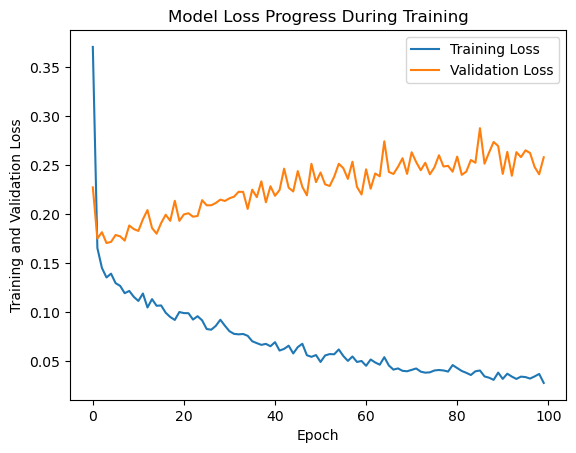

In [49]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

9/9 [==============================] - 0s 2ms/step


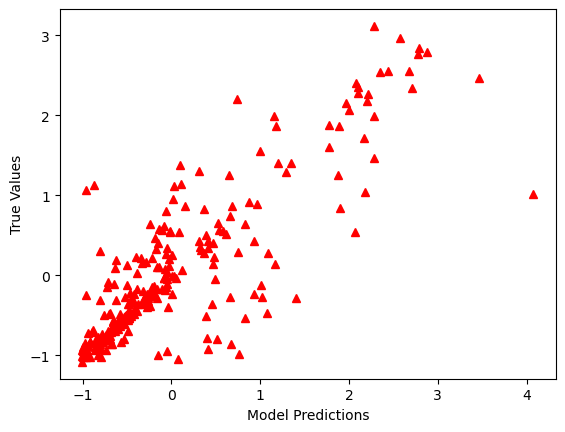

In [50]:
y_predict = ANN_model.predict(x_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [51]:
y_predict_orig = scalar_y.inverse_transform(y_predict)
y_test_orig = scalar_y.inverse_transform(y_test)

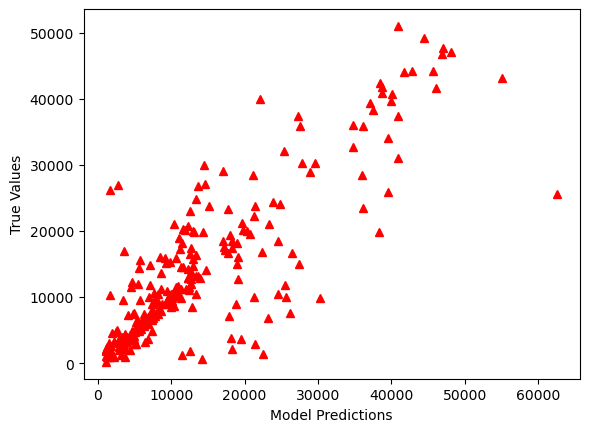

In [52]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [53]:
k = x_test.shape[1]
n = len(x_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6580.059 
MSE = 43297172.0 
MAE = 3813.6372 
R2 = 0.6912872853923157 
Adjusted R2 = 0.6817517575279857


# Thank You

<img src="myself.png" style="width:909px;height:509">